In [23]:
# Initializing imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from dotenv import load_dotenv
from pathlib import Path
from panel.interact import interact
%matplotlib inline

In [24]:
# load .env enviroment variables
load_dotenv()

True

In [25]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

In [26]:
# Reading census data into a dataframe
file_path = Path ("sfo_neighborhoods_census_data.csv")
data = pd.read_csv(file_path, index_col="year")
data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [27]:
# Calculating mean number of housing supply
housing_units = data.groupby('year').mean()

housing_units.drop(['sale_price_sqr_foot', 'gross_rent'], axis=1)

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


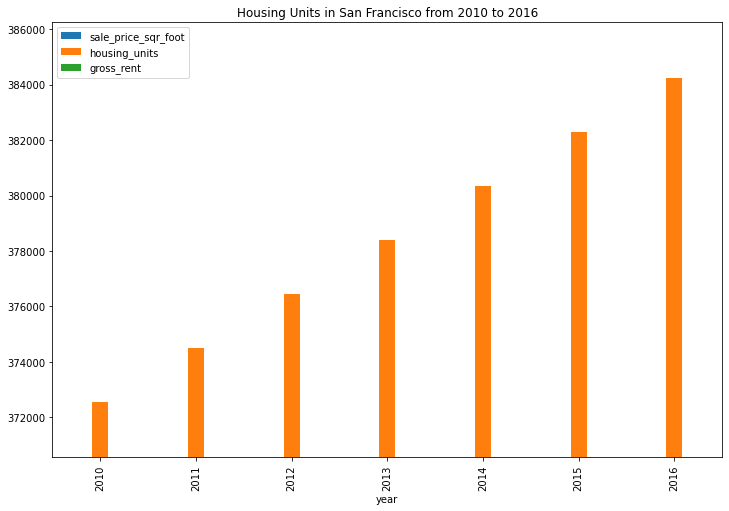

In [28]:
# Plotting the mean 
min = housing_units.min()['housing_units']
max = housing_units.max()['housing_units']
housing_units.plot.bar(ylim = (min-2000, max+2000),title="Housing Units in San Francisco from 2010 to 2016", figsize = (12,8))

plt.show()
plt.close('housing_units')

In [29]:
# Calculating average gross rent and average sales prices per sq foot
average_rent_sqr_foot = data["gross_rent"].groupby([data.index]).mean()
average_rent_sqr_foot

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

<AxesSubplot:title={'center':'Average Gross Rent on Annual Basis'}, xlabel='year'>

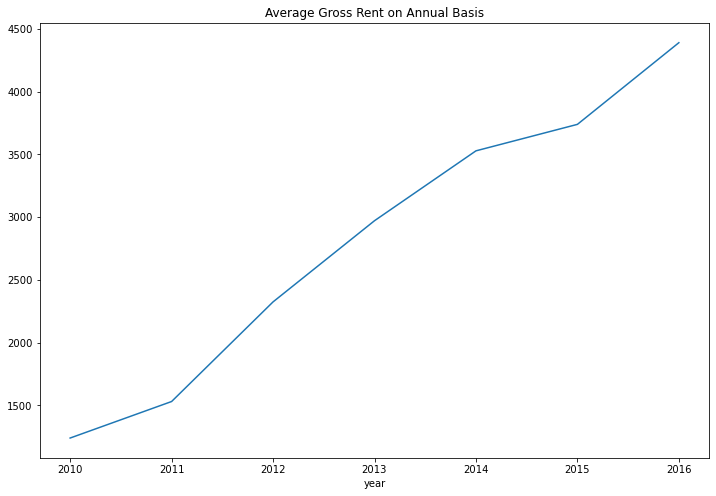

In [30]:
# Average gross rent plotted on a line chart
average_rent_sqr_foot.plot.line(title="Average Gross Rent on Annual Basis", figsize=(12,8))

<AxesSubplot:title={'center':'Average Sales Price per sq Foot'}, xlabel='year'>

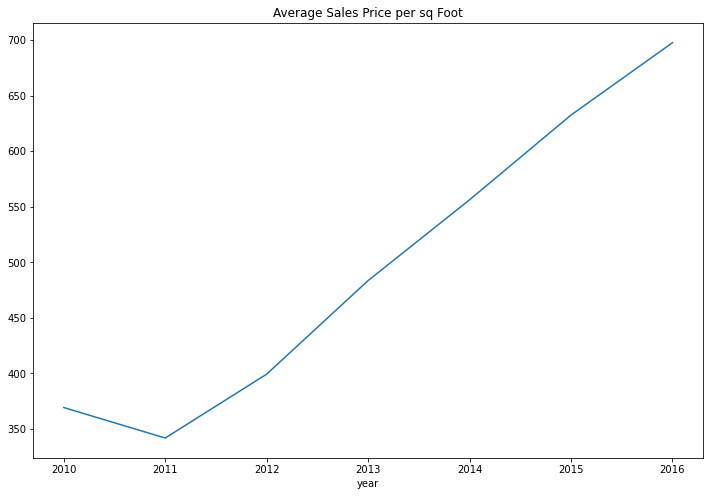

In [31]:
# Average sales price plotted on a line chart
average_price_per_sqr_foot = data["sale_price_sqr_foot"].groupby([data.index]).mean()
average_price_per_sqr_foot.plot(title="Average Sales Price per sq Foot", figsize=(12,8))

In [32]:
# Group by year and neighborhood and generate new dataframe
sf_data_new = data.groupby([data.index, "neighborhood"]).mean()
sf_sales = sf_data_new["sale_price_sqr_foot"]
sf_sales_df = pd.DataFrame(sf_sales).reset_index()
sf_sales_df.head()

,year,neighborhood,sale_price_sqr_foot
0,2010,Alamo Square,291.182945
1,2010,Anza Vista,267.932583
2,2010,Bayview,170.098665
3,2010,Buena Vista Park,347.394919
4,2010,Central Richmond,319.027623


In [33]:
# Interactive line chart of average price per sq foot 
def choose_neighborhood(neighborhood):
    
    return sf_sales_df.loc[sf_sales_df['neighborhood']==neighborhood,:].hvplot.line(
    x="year",
    y="sale_price_sqr_foot",
    colormap="virdis",
    title="San Francisco Sale Price per Sq Foot"
    )

neighborhood_choice = sf_sales_df["neighborhood"]

interact(choose_neighborhood, neighborhood=neighborhood_choice)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02225')

In [34]:
top_10_most_expensive = data.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
top_10_most_expensive

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2015,Union Square District,2258.702832,382295,3739
2016,Presidio Heights,1465.968586,384242,4390
2016,Merced Heights,1416.666667,384242,4390
2013,Union Square District,1290.472107,378401,2971
2014,Miraloma Park,1267.766203,380348,3528
2016,Parnassus/Ashbury Heights,1207.997485,384242,4390
2016,Outer Richmond,1196.645437,384242,4390
2015,Marina,1132.837361,382295,3739
2014,South of Market,1119.838877,380348,3528


In [35]:
expensive_places = data.groupby("neighborhood").mean()
expensive_places.sort_values("sale_price_sqr_foot", ascending=False, inplace=True)
expensive_places.head(10)
# expensive_places

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [36]:
data[["neighborhood", "sale_price_sqr_foot", "gross_rent"]].hvplot.bar(groupby="neighborhood", rot=90) 

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [37]:
avg_value_per_neighborhood = data.groupby([data["neighborhood"]]).mean()
avg_value_per_neighborhood = avg_value_per_neighborhood.reset_index()
avg_value_per_neighborhood.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333
5,Buena Vista Park,452.680591,378076.5,2698.833333
6,Central Richmond,394.422399,378401.0,2817.285714
7,Central Sunset,423.687928,378401.0,2817.285714
8,Clarendon Heights,487.244886,376454.0,2250.500000
9,Corona Heights,587.539067,377232.8,2472.000000


In [38]:
# Data from 10 top most expensive plotted
top_10_most_expensive.hvplot.bar(
    x="neighborhood",
    y="sale_price_sqr_foot",
    title="Top 10 Most Expensive Neighborhoods",
    height=400,
    rot=46)

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [39]:
# Parallel Coordinates plotted
px.parallel_coordinates(top_10_most_expensive,
                        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
                        color='sale_price_sqr_foot',
                        color_continuous_scale=px.colors.sequential.Inferno,
)

In [40]:
px.parallel_categories(
    top_10_most_expensive.head(10),
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)

In [41]:
# Neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [42]:
# Calculating mean price for each neighborhood
file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_location = pd.read_csv(file_path)

In [43]:
# Join values with locations
avg_value_location = pd.concat([avg_value_per_neighborhood, df_neighborhood_location], axis="columns", join="inner")
avg_value_location.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Neighborhood,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,Alamo Square,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,Anza Vista,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,Bayview,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,Bernal Heights,37.728630,-122.443050


In [44]:
# Scattered mapbox plot to analyze data
px.scatter_mapbox(
    avg_value_location,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title="Average Sale Price per Sq Foot and Gross Rent"
)